# The CGMES in pyPowSyBl: merging, load flow and PTDF calculation

In [1]:
import pypowsybl as pp

Load CGMES micro grids BE and NL

In [2]:
be = pp.network.create_micro_grid_be_network()
nl = pp.network.create_micro_grid_nl_network()

Save network ids

In [3]:
be_id = be.id
nl_id = nl.id

Display the two networks

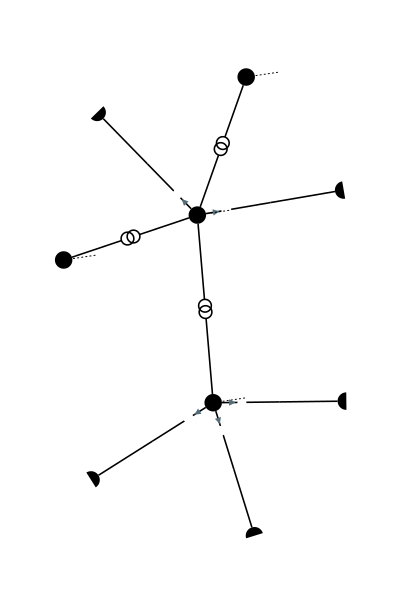

In [4]:
nl.get_network_area_diagram()

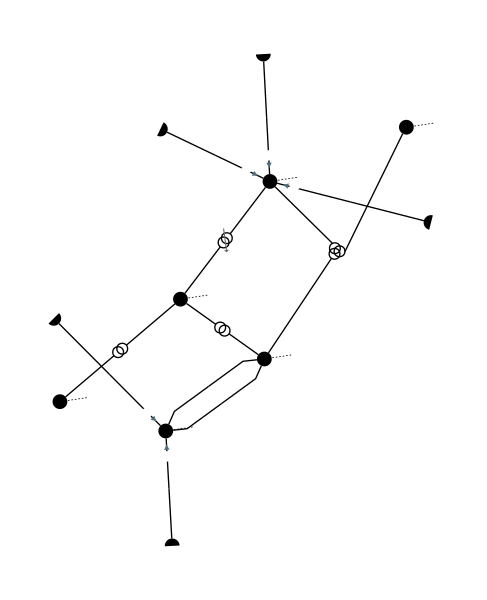

In [5]:
be.get_network_area_diagram()

The half circles are dangling lines that can be merged to the other network to create tie lines.

Display the substations of the two networks

In [6]:
be.get_substations()

,name,TSO,geo_tags,country
id,,,,
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE


In [7]:
nl.get_substations()

,name,TSO,geo_tags,country
id,,,,
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display dangling lines information and check that the pairing keys are matching

In [8]:
be.get_dangling_lines(attributes=['pairing_key'])

,pairing_key
id,
17086487-56ba-4979-b8de-064025a6b4da,TN_Border_ST23
78736387-5f60-4832-b3fe-d50daf81b0a6,TN_Border_AL11
b18cd1aa-7808-49b9-a7cf-605eaf07b006,TN_Border_GY11
a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4,TN_Border_ST24
ed0c5d75-4a54-43c8-b782-b20d7431630b,TN_Border_MA11


In [9]:
nl.get_dangling_lines(attributes=['pairing_key'])

,pairing_key
id,
8fdc7abd-3746-481a-a65e-3df56acd8b13,TN_Border_ST23
7f43f508-2496-4b64-9146-0a40406cbe49,TN_Border_AL11
e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc,TN_Border_GY11
a279a3dc-550b-426c-af3a-61b7be508dcc,TN_Border_ST24
dad02278-bd25-476f-8f58-dbe44be72586,TN_Border_MA11


Merge the NL network into BE, the result is that the NL network will be empty and BE network will contain two subnetworks

In [10]:
be.merge(nl)
eu = be

Get all substations as a Pandas data frame

In [11]:
eu.get_substations()

,name,TSO,geo_tags,country
id,,,,
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display the merged network

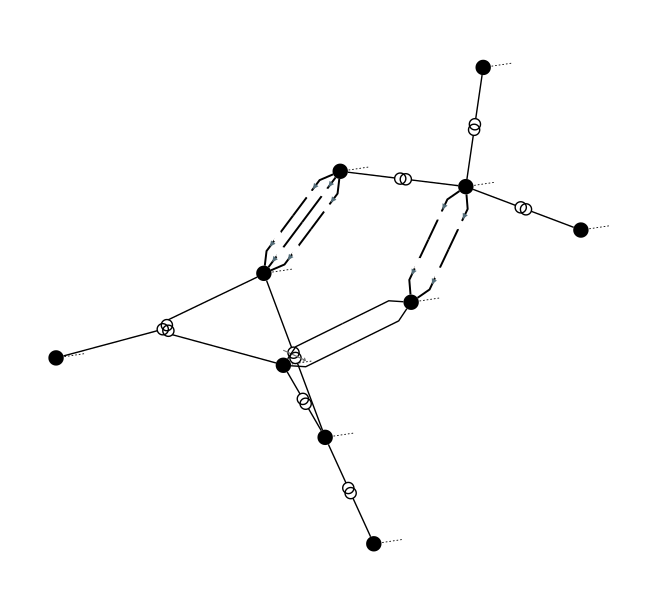

In [12]:
eu.get_network_area_diagram()

Display the substations of each subnetwork, nl is now not available anymore except through subnetworks

In [13]:
eu.get_sub_network(nl_id).get_substations()

,name,TSO,geo_tags,country
id,,,,
c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


In [14]:
eu.get_sub_network(be_id).get_substations()

,name,TSO,geo_tags,country
id,,,,
37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE


Run an AC load flow

In [15]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, status_text=Converged, iteration_count=7, reference_bus_id='c1d5bfde8f8011e08e4d00247eb1f55e_0', slack_bus_results=[SlackBusResult(id='c1d5bfde8f8011e08e4d00247eb1f55e_0', active_power_mismatch=-0.21366219014484766)], distributed_active_power=-45.16664728458926)]

In [16]:
eu.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
3a3b27be-b18b-4385-b557-6735d733baf0,BE-G1,OTHER,90.000000,50.0,200.0,NaN,NaN,300.0,CURVE,115.50000,100.256000,True,a708c3bc-465d-4fe7-b6ef-6fa6408a62b0,-85.245616,57.537385,5682.888931,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386_0,True
550ebe0d-f2b2-48c1-991f-cebea43a21aa,BE-G2,OTHER,118.000000,50.0,200.0,-200.0,200.0,300.0,MIN_MAX,21.98700,18.720301,True,550ebe0d-f2b2-48c1-991f-cebea43a21aa,-113.245616,-84.453532,3709.545342,929ba893-c9dc-44d7-b1fd-30834bd3ab85,929ba893-c9dc-44d7-b1fd-30834bd3ab85_0,True
2844585c-0d35-488d-a449-685bcd57afbf,NL-G2,OTHER,140.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,77.743000,True,2844585c-0d35-488d-a449-685bcd57afbf,-134.057020,-0.000000,4781.183683,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
1dc9afba-23b5-41a0-8540-b479ed8baf4b,NL-G3,OTHER,150.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,83.296000,True,1dc9afba-23b5-41a0-8540-b479ed8baf4b,-144.057020,-0.000000,5137.836671,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
9c3b8f97-7972-477d-9dc8-87365cc0ad0e,NL-G1,OTHER,600.492701,300.0,1000.0,0.0,600.0,1100.0,MIN_MAX,16.03350,386.922556,True,9c3b8f97-7972-477d-9dc8-87365cc0ad0e,-576.720781,-206.084407,22053.200473,8d8a82ba-b5b0-4e94-861a-192af055f2b8,8d8a82ba-b5b0-4e94-861a-192af055f2b8_0,True


Get active power setpoint of generator 3a3b27be-b18b-4385-b557-6735d733baf0

In [17]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

np.float64(90.0)

Update active power setpoint to 100 MW

In [18]:
eu.update_generators(id='3a3b27be-b18b-4385-b557-6735d733baf0', target_p=100)

Check active power setpoint has been updated

In [19]:
generators = eu.get_generators()
generators['target_p']['3a3b27be-b18b-4385-b557-6735d733baf0']

np.float64(100.0)

Re-run AC load flow with new setpoint

In [20]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, status_text=Converged, iteration_count=7, reference_bus_id='c1d5bfde8f8011e08e4d00247eb1f55e_0', slack_bus_results=[SlackBusResult(id='c1d5bfde8f8011e08e4d00247eb1f55e_0', active_power_mismatch=-0.25955289487091804)], distributed_active_power=-55.2225126815256)]

Get generators data frame and check that the active powers have been updated after the modification of the set point

In [21]:
eu.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
3a3b27be-b18b-4385-b557-6735d733baf0,BE-G1,OTHER,100.000000,50.0,200.0,NaN,NaN,300.0,CURVE,115.50000,100.256000,True,a708c3bc-465d-4fe7-b6ef-6fa6408a62b0,-94.187104,58.301221,6123.602646,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386,4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386_0,True
550ebe0d-f2b2-48c1-991f-cebea43a21aa,BE-G2,OTHER,118.000000,50.0,200.0,-200.0,200.0,300.0,MIN_MAX,21.98700,18.720301,True,550ebe0d-f2b2-48c1-991f-cebea43a21aa,-112.187104,-84.603909,3689.677534,929ba893-c9dc-44d7-b1fd-30834bd3ab85,929ba893-c9dc-44d7-b1fd-30834bd3ab85_0,True
2844585c-0d35-488d-a449-685bcd57afbf,NL-G2,OTHER,140.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,77.743000,True,2844585c-0d35-488d-a449-685bcd57afbf,-132.733880,-0.000000,4733.761755,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
1dc9afba-23b5-41a0-8540-b479ed8baf4b,NL-G3,OTHER,150.000000,130.0,250.0,0.0,200.0,250.0,MIN_MAX,16.01775,83.296000,True,1dc9afba-23b5-41a0-8540-b479ed8baf4b,-142.733880,-0.000000,5090.397284,2a37dc57-2faf-464a-8175-bc415f9a635f,2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
9c3b8f97-7972-477d-9dc8-87365cc0ad0e,NL-G1,OTHER,600.492701,300.0,1000.0,0.0,600.0,1100.0,MIN_MAX,16.03350,386.922556,True,9c3b8f97-7972-477d-9dc8-87365cc0ad0e,-571.428221,-205.411167,21865.615940,8d8a82ba-b5b0-4e94-861a-192af055f2b8,8d8a82ba-b5b0-4e94-861a-192af055f2b8_0,True


Get lines data frame

In [22]:
eu.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
b58bf21a-096a-4dae-9a01-3f03b60c24c7,BE-Line_2,1.935,34.2,0.000034,0.000021,0.000034,0.000021,-17.685639,-5.312858,47.488283,21.115713,3.434416,54.811563,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
ffbabc27-1ccd-4fdc-b037-e341706c8d29,BE-Line_6,5.203,71.0,0.000060,0.000010,0.000060,0.000010,-6.336742,-2.391001,17.417027,12.417184,1.507009,32.047555,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,d0486169-2205-40b2-895e-b672ecb9e5fc,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True


In [23]:
eu.get_dangling_lines()

,name,r,x,g,b,p0,q0,p,q,i,voltage_level_id,bus_id,connected,pairing_key,ucte_xnode_code,paired,tie_line_id
id,,,,,,,,,,,,,,,,,
ed0c5d75-4a54-43c8-b782-b20d7431630b,BE-Line_4,0.24,2.00,0.000040,0.000025,-43.687227,84.876604,-44.074415,79.398809,126.703886,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_MA11,TN_Border_MA11,True,dad02278-bd25-476f-8f58-dbe44be72586 + ed0c5d7...
b18cd1aa-7808-49b9-a7cf-605eaf07b006,BE-Line_5,0.42,6.30,0.000042,0.000066,-90.037005,148.603743,-90.107574,132.603780,223.687774,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_GY11,TN_Border_GY11,True,b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b...
78736387-5f60-4832-b3fe-d50daf81b0a6,BE-Line_3,1.05,12.00,0.000060,0.000150,-46.816625,79.193778,-39.254095,50.754496,89.522972,469df5f7-058f-4451-a998-57a48e8a56fe,469df5f7-058f-4451-a998-57a48e8a56fe_0,True,TN_Border_AL11,TN_Border_AL11,True,78736387-5f60-4832-b3fe-d50daf81b0a6 + 7f43f50...
a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4,BE-Line_7,4.60,69.00,0.000058,0.000022,-26.805006,1.489867,-16.294068,-0.556141,41.771397,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,TN_Border_ST24,TN_Border_ST24,True,a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4 + a279a3d...
17086487-56ba-4979-b8de-064025a6b4da,BE-Line_1,2.20,68.20,0.000031,0.000083,-27.365225,0.425626,-18.238829,-4.385284,48.061508,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,TN_Border_ST23,TN_Border_ST23,True,17086487-56ba-4979-b8de-064025a6b4da + 8fdc7ab...
a279a3dc-550b-426c-af3a-61b7be508dcc,NL-Line_3,5.06,69.00,0.000023,0.000020,26.805006,-1.489867,20.460359,-0.575155,52.257277,c1d5bfea8f8011e08e4d00247eb1f55e,c1d5bfea8f8011e08e4d00247eb1f55e_0,True,TN_Border_ST24,TN_Border_ST24,True,a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4 + a279a3d...
8fdc7abd-3746-481a-a65e-3df56acd8b13,NL-Line_4,2.20,66.00,0.000024,0.000090,27.365225,-0.425626,21.074380,-3.384612,54.493757,c1d5bfea8f8011e08e4d00247eb1f55e,c1d5bfea8f8011e08e4d00247eb1f55e_0,True,TN_Border_ST23,TN_Border_ST23,True,17086487-56ba-4979-b8de-064025a6b4da + 8fdc7ab...
7f43f508-2496-4b64-9146-0a40406cbe49,NL-Line_1,1.02,12.00,0.000030,0.000141,46.816625,-79.193778,54.662015,-98.973320,159.359054,c1d5bfde8f8011e08e4d00247eb1f55e,c1d5bfde8f8011e08e4d00247eb1f55e_0,True,TN_Border_AL11,TN_Border_AL11,True,78736387-5f60-4832-b3fe-d50daf81b0a6 + 7f43f50...
e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc,NL-Line_5,0.42,6.30,0.000035,0.000065,90.037005,-148.603743,103.320111,-152.565573,259.703284,c1d5bfde8f8011e08e4d00247eb1f55e,c1d5bfde8f8011e08e4d00247eb1f55e_0,True,TN_Border_GY11,TN_Border_GY11,True,b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b...


Run sensitivity analysis:

The variables are:
 - node (generator 3a3b27be-b18b-4385-b557-6735d733baf0) to slack
 - zone (BE) to slack
 - zone (BE) to zone (NL) => PTDF

We check the sensitivity of the BE/NL tie line 'b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc'

In [24]:
sa = pp.sensitivity.create_dc_analysis()
country_be = pp.sensitivity.create_country_zone(eu, 'BE')
country_nl = pp.sensitivity.create_country_zone(eu, 'NL')
sa.set_zones([country_be, country_nl])
sa.set_branch_flow_factor_matrix(branches_ids=['b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc'], variables_ids=['3a3b27be-b18b-4385-b557-6735d733baf0', 'BE', ('BE', 'NL')])
results = sa.run(eu)
results.get_branch_flows_sensitivity_matrix()

,b18cd1aa-7808-49b9-a7cf-605eaf07b006 + e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc
3a3b27be-b18b-4385-b557-6735d733baf0,0.334200
BE,0.331359
BE -> NL,0.419779
